We will do an analysis based on a dataset of ETF built by scrapping the iShares web

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import *
import seaborn as sns


pd.set_option('display.max_columns', 50)

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("etfs_equity.csv")

In [3]:
df.head()

,Unnamed: 0,assetClass,beta3Yr,cost,date,distYield,dnow,modelOad,numHoldings,optionAdjustedSpread,priceBook,priceEarnings,sharesOutstanding,standardDeviation3Yr,thirtyDaySecYield,ticker,totalNetAssets,twelveMonTrlYld,weightedAvgCoupon,weightedAvgLife,yieldToWorst,link
0,0,Equity,1.18,0.0030,2019-06-17 00:00:00.000000,0.0134,2019-06-18 10:19:41.120984,NaN,498.0,NaN,1.97,14.14,5650000.0,0.1616,0.0120,SMLF,2.223617e+08,0.0121,NaN,NaN,NaN,https://www.ishares.com/us/products/272825/ish...
1,1,Real Estate,0.34,0.0048,2019-06-17 00:00:00.000000,0.0297,2019-06-18 10:19:47.683190,NaN,43.0,NaN,2.65,NaN,6400000.0,0.1384,0.0259,REZ,4.767654e+08,0.0307,NaN,NaN,NaN,https://www.ishares.com/us/products/239545/ish...
2,2,Equity,NaN,0.0018,2019-06-17 00:00:00.000000,0.0263,2019-06-18 10:19:49.202682,NaN,262.0,NaN,NaN,NaN,200000.0,NaN,0.0210,IEFN,4.709209e+06,0.0213,NaN,NaN,0.0001,https://www.ishares.com/us/products/292421/
3,3,Equity,0.55,0.0031,2019-06-17 00:00:00.000000,0.0204,2019-06-18 10:19:52.687116,NaN,442.0,NaN,2.33,21.72,51200000.0,0.0822,0.0238,ACWV,4.660016e+09,0.0212,NaN,NaN,NaN,https://www.ishares.com/us/products/239605/ish...
4,4,Equity,1.06,0.0015,2019-06-17 00:00:00.000000,0.0164,2019-06-18 10:19:56.614950,NaN,643.0,NaN,2.60,18.59,4700000.0,0.1274,0.0177,EUSA,2.728362e+08,0.0180,NaN,NaN,NaN,https://www.ishares.com/us/products/239693/ish...


In [4]:
df.shape

(334, 22)

We reduce the analysis to Fixed Income and Equity ETFs only. Also we elminate the cells that are all Nans

In [5]:
df = df[df.assetClass.isin(['Equity', "Fixed Income"])]
df = df.iloc[:,1:]
df = df[~df.isnull()]

Here we have the percentage of nulls by columns

In [6]:
df.isnull().sum(axis=0) / df.shape[0]

assetClass              0.000000
beta3Yr                 0.200647
cost                    0.000000
date                    0.000000
distYield               0.045307
dnow                    0.000000
modelOad                0.766990
numHoldings             0.000000
optionAdjustedSpread    0.822006
priceBook               0.381877
priceEarnings           0.381877
sharesOutstanding       0.000000
standardDeviation3Yr    0.200647
thirtyDaySecYield       0.032362
ticker                  0.000000
totalNetAssets          0.006472
twelveMonTrlYld         0.071197
weightedAvgCoupon       0.715210
weightedAvgLife         0.715210
yieldToWorst            0.692557
link                    0.000000
dtype: float64

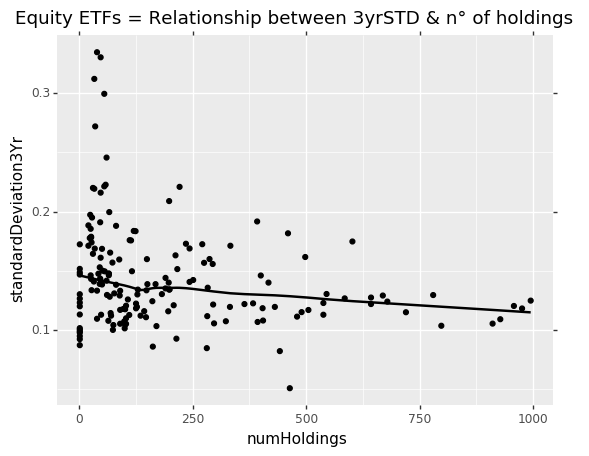

<ggplot: (-9223363301830333745)>

In [7]:
ggplot(df.query("assetClass == 'Equity' & numHoldings < 1000"), aes(x="numHoldings", y="standardDeviation3Yr")) + geom_point() + geom_smooth() + ggtitle("Equity ETFs = Relationship between 3yrSTD & n° of holdings ")

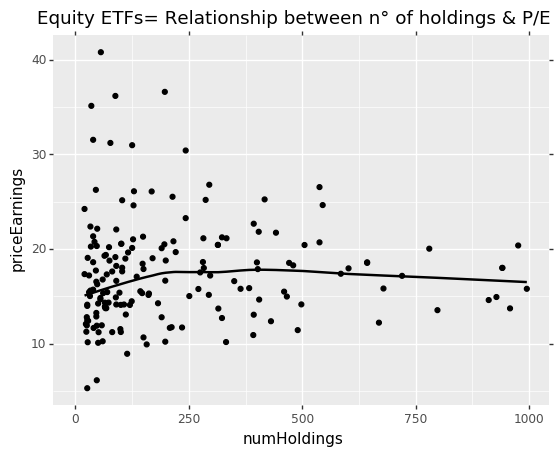

<ggplot: (8735024224737)>

In [8]:
ggplot(df.query("assetClass == 'Equity' & numHoldings < 1000"), aes(x="numHoldings", y="priceEarnings")) + geom_point() + geom_smooth()+ ggtitle("Equity ETFs= Relationship between n° of holdings & P/E")

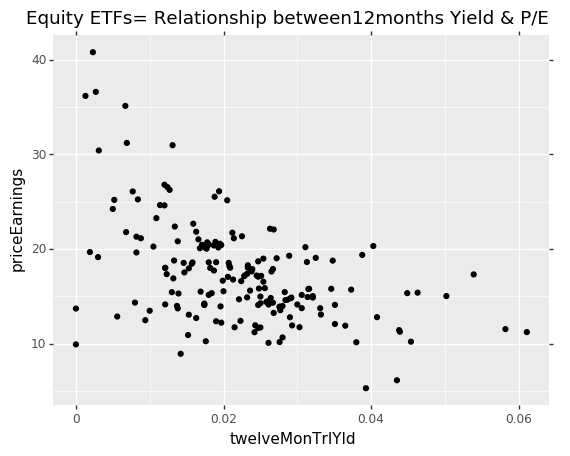

<ggplot: (8735024184454)>

In [9]:
ggplot(df[df.assetClass == 'Equity'], aes(x="twelveMonTrlYld", y="priceEarnings")) + geom_point() + ggtitle("Equity ETFs= Relationship between12months Yield & P/E  ")

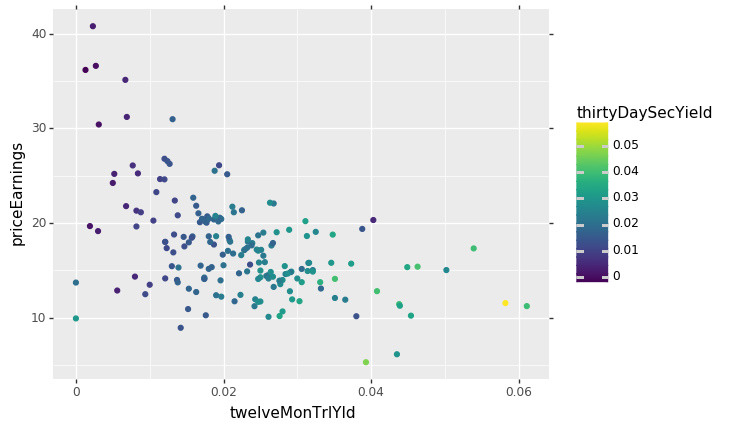

<ggplot: (-9223363301830591330)>

In [10]:
ggplot(df[df.assetClass == 'Equity'], aes(x="twelveMonTrlYld", y="priceEarnings", color="thirtyDaySecYield")) + geom_point()

Now we want to pick Equity ETFs with a P/E less than 11

In [11]:
df.query("assetClass == 'Equity' & priceEarnings <10 ").T

,130,323,324,333
assetClass,Equity,Equity,Equity,Equity
beta3Yr,NaN,0.49,0.16,0.89
cost,0.0015,0.0059,0.0059,0.0059
date,2019-06-17 00:00:00.000000,2019-06-17 00:00:00.000000,2019-06-17 00:00:00.000000,2019-06-17 00:00:00.000000
distYield,0,0.069,0.0061,0.0142
dnow,2019-06-18 10:28:46.652812,2019-06-18 10:42:32.167791,2019-06-18 10:42:36.222650,2019-06-18 10:43:21.060918
modelOad,NaN,NaN,NaN,NaN
numHoldings,157,26,47,114
optionAdjustedSpread,NaN,NaN,NaN,NaN
priceBook,0.85,0.85,1.02,0.94


We add a new condition => TwelveMonTrlYld >0.04

In [12]:
df.query("assetClass == 'Equity' & priceEarnings < 10 & twelveMonTrlYld > 0.04").T

,324
assetClass,Equity
beta3Yr,0.16
cost,0.0059
date,2019-06-17 00:00:00.000000
distYield,0.0061
dnow,2019-06-18 10:42:36.222650
modelOad,NaN
numHoldings,47
optionAdjustedSpread,NaN
priceBook,1.02


If we want to add a new feature to the analsys  we have to do a melt.  Here we add Total Net Assets

In [13]:
mdf = pd.melt(df[df.assetClass == 'Equity'], 
              id_vars=['ticker', "priceEarnings"], 
              value_vars=["twelveMonTrlYld", "numHoldings"])

In [14]:
mdf.head()

,ticker,priceEarnings,variable,value
0,SMLF,14.14,twelveMonTrlYld,0.0121
1,IEFN,NaN,twelveMonTrlYld,0.0213
2,ACWV,21.72,twelveMonTrlYld,0.0212
3,EUSA,18.59,twelveMonTrlYld,0.0180
4,KXI,22.06,twelveMonTrlYld,0.0268


In [15]:
mdf.tail()

,ticker,priceEarnings,variable,value
429,ICOL,12.40,numHoldings,28.0
430,ECH,15.60,numHoldings,33.0
431,FXI,10.08,numHoldings,50.0
432,EWT,14.13,numHoldings,90.0
433,EWY,8.92,numHoldings,114.0


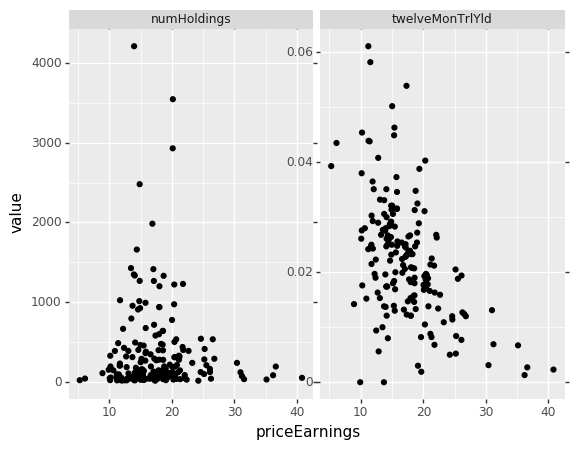

<ggplot: (8735024180421)>

In [16]:
ggplot(mdf, aes(x= "priceEarnings", y="value")) + facet_wrap("~variable", scales="free_y") + geom_point()

Another way to plot the relationship between more than two features is using a seaborn wich is more simply because yo don't need to do a melt before the plot

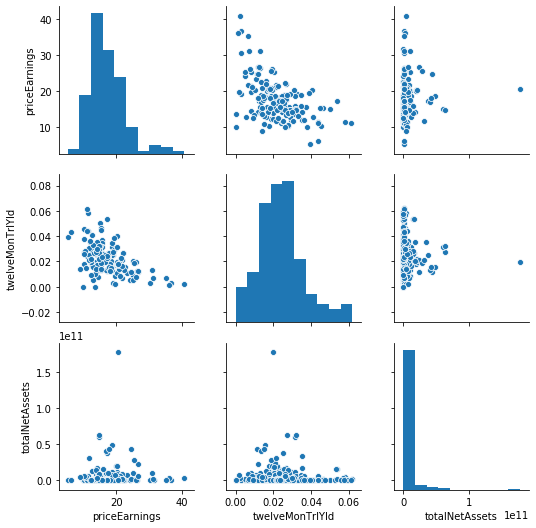

In [17]:
sns.pairplot(df[["priceEarnings", "twelveMonTrlYld", "totalNetAssets"]])